FILE FILE YANG DIBUTUHKAN : https://drive.google.com/drive/folders/0AP8QNddJ-Zc1Uk9PVA

SCRAPING DATASET CURAH HUJAN

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
from google.colab import drive
import os

drive.mount('/content/drive')

nc_path = '/content/drive/Shareddrives/File Project Data Wrangling/CDR_1084_2025-11-09022621am.nc'
csv_output_labeled = "/content/Curah Hujan.csv"

os.makedirs(os.path.dirname(csv_output_labeled), exist_ok=True)

var_name = "precip"

Mounted at /content/drive


In [ ]:
!pip install xarray netCDF4 matplotlib cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00


<xarray.Dataset> Size: 48kB
Dimensions:   (datetime: 36, lat: 15, lon: 22)
Coordinates:
  * datetime  (datetime) datetime64[ns] 288B 2022-01-01 ... 2024-12-01
  * lat       (lat) float32 60B -5.25 -5.5 -5.75 -6.0 ... -8.0 -8.25 -8.5 -8.75
  * lon       (lon) float32 88B 110.8 111.0 111.2 111.5 ... 115.5 115.8 116.0
Data variables:
    crs       int32 4B ...
    precip    (datetime, lat, lon) float32 48kB ...
Attributes:
    Conventions:  CF-1.6


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


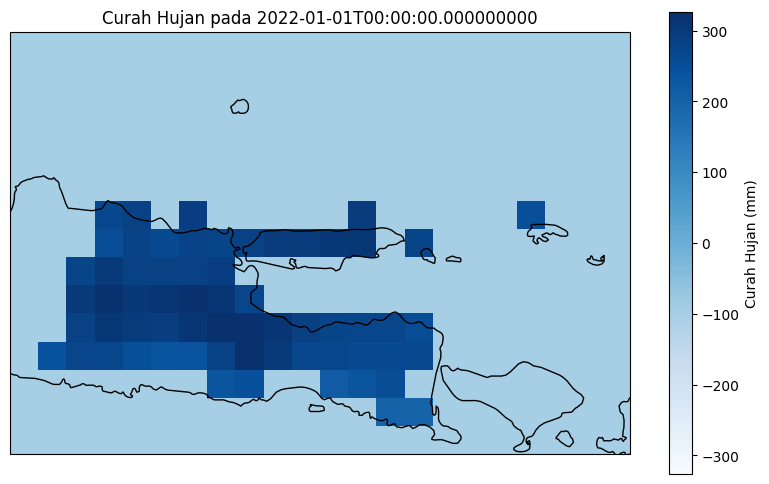

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ds = xr.open_dataset(nc_path)
print(ds)

data_var = ds['precip']
time_index = 0
data_slice = data_var.isel(datetime=time_index)

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
data_slice.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'label': 'Curah Hujan (mm)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f'Curah Hujan pada {str(data_slice.datetime.values)}')
plt.show()

In [ ]:
ds = xr.open_dataset(nc_path)
da = ds[var_name]

In [ ]:
df = da.to_dataframe().reset_index()
df.head(100)

,datetime,lat,lon,precip
0,2022-01-01,-5.25,110.75,-99.0
1,2022-01-01,-5.25,111.00,-99.0
2,2022-01-01,-5.25,111.25,-99.0
3,2022-01-01,-5.25,111.50,-99.0
4,2022-01-01,-5.25,111.75,-99.0
...,...,...,...,...
95,2022-01-01,-6.25,112.50,-99.0
96,2022-01-01,-6.25,112.75,-99.0
97,2022-01-01,-6.25,113.00,-99.0
98,2022-01-01,-6.25,113.25,-99.0


In [ ]:
df[var_name] = df[var_name].replace(-99.0, np.nan)
df = df.dropna(subset=[var_name])

print("baris data kosong dihapus.")

df.head()

baris data kosong dihapus.


,datetime,lat,lon,precip
135,2022-01-01,-6.75,111.50,268.278015
136,2022-01-01,-6.75,111.75,281.283508
138,2022-01-01,-6.75,112.25,289.568909
144,2022-01-01,-6.75,113.75,294.995117
150,2022-01-01,-6.75,115.25,252.023651


In [ ]:
df.to_csv(csv_output_labeled, index=False)
df.head()

,datetime,lat,lon,precip
135,2022-01-01,-6.75,111.50,268.278015
136,2022-01-01,-6.75,111.75,281.283508
138,2022-01-01,-6.75,112.25,289.568909
144,2022-01-01,-6.75,113.75,294.995117
150,2022-01-01,-6.75,115.25,252.023651


In [ ]:
input_csv = 'Curah Hujan.csv'
output_csv = 'Curah Hujan.csv'

try:
    df = pd.read_csv(input_csv)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['Tahun'] = df['datetime'].dt.year
    df['Bulan'] = df['datetime'].dt.month
    df_agg = df.groupby(['Tahun', 'Bulan'])['precip'].mean().reset_index()
    df_agg.rename(columns={'precip': 'Curah Hujan (mm)'}, inplace=True)
    df_agg['Curah Hujan (mm)'] = df_agg['Curah Hujan (mm)'].round(2)
    df_agg['Periode'] = (
        df_agg['Tahun'].astype(str) + '-' +
        df_agg['Bulan'].astype(str).str.zfill(2)
    )

    df_simple = df_agg[['Periode', 'Curah Hujan (mm)']]

    print(df_simple.head())

    df_simple.to_csv(output_csv, index=False)

except FileNotFoundError:
    print(f"Error: File '{input_csv}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")


   Periode  Curah Hujan (mm)
0  2022-01            277.75
1  2022-02            284.38
2  2022-03            346.85
3  2022-04            198.20
4  2022-05            190.29


SCRAPING PRODUKSI PADI

In [ ]:
!pip install pdfplumber pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.8 MB/s eta 0:00:00


In [ ]:
import pdfplumber
import re

pdf_path = "/content/drive/Shareddrives/File Project Data Wrangling/luas-panen-dan-produksi-padi-di-indonesia-2024.pdf"

start_page = 82
end_page = 87
output_csv = "/content/data produksi 2023-2024.csv"

print(f"Mengekstrak 'Jawa Timur' dari hal {start_page}-{end_page}...")
raw_lines = []

with pdfplumber.open(pdf_path) as pdf:
        for i in range(start_page - 1, end_page):
            page = pdf.pages[i]
            text = page.extract_text()

            if text:
                lines = text.split('\n')

                for line in lines:
                    if "jawa timur" in line.lower():
                        print(f"Hal {i+1}: {line}")
                        raw_lines.append(line)

if raw_lines:
        df = pd.DataFrame(raw_lines, columns=["Raw_Text"])
        df.to_csv(output_csv, index=False)
        print(f"\n{len(raw_lines)} baris mentah tersimpan.")

        for idx, row in enumerate(raw_lines):
            print(f"{idx+1}. {row}")
else:
        print("Tidak ditemukan teks 'Jawa Timur' di rentang halaman tersebut.")

Mengekstrak 'Jawa Timur' dari hal 82-87...
Hal 82: Jawa Timur 277.035,02 310.234,48s 1.321.465,79 2.135.744,25
Hal 83: Jawa Timur 865.264,09 649.6s71,78 889.962,44 866.020,53
Hal 84: Jawa Timur 652.260,74 471.937,28 s462.469,22 368.369,67 9.270.435,29
Hal 85: Jawa Timur 319.104,79 978p.255,37 2.109.963,82 1.187.207,40
Hal 86: Jawa Timur 626.767,96 940.075p,20 924.228,51 743.342,68
Hal 87: Jawa Timur 528.980,73 428.91p4,00 485.115,13 438.705,74 9.710.661,33

6 baris mentah tersimpan.
1. Jawa Timur 277.035,02 310.234,48s 1.321.465,79 2.135.744,25
2. Jawa Timur 865.264,09 649.6s71,78 889.962,44 866.020,53
3. Jawa Timur 652.260,74 471.937,28 s462.469,22 368.369,67 9.270.435,29
4. Jawa Timur 319.104,79 978p.255,37 2.109.963,82 1.187.207,40
5. Jawa Timur 626.767,96 940.075p,20 924.228,51 743.342,68
6. Jawa Timur 528.980,73 428.91p4,00 485.115,13 438.705,74 9.710.661,33


In [ ]:
input_csv = "/content/data produksi 2023-2024.csv"
output_csv = "/content/data produksi 2023-2024.csv"

df = pd.read_csv(input_csv)
line_1 = str(df.iloc[0, 0]) + " " + str(df.iloc[1, 0]) + " " + str(df.iloc[2, 0])
line_2 = str(df.iloc[3, 0]) + " " + str(df.iloc[4, 0]) + " " + str(df.iloc[5, 0])
result_df = pd.DataFrame([line_1, line_2])
result_df.to_csv(output_csv, index=False, header=False)

print(line_1)
print(line_2)

Jawa Timur 277.035,02 310.234,48s 1.321.465,79 2.135.744,25 Jawa Timur 865.264,09 649.6s71,78 889.962,44 866.020,53 Jawa Timur 652.260,74 471.937,28 s462.469,22 368.369,67 9.270.435,29
Jawa Timur 319.104,79 978p.255,37 2.109.963,82 1.187.207,40 Jawa Timur 626.767,96 940.075p,20 924.228,51 743.342,68 Jawa Timur 528.980,73 428.91p4,00 485.115,13 438.705,74 9.710.661,33


Cleaning produksi padi (2023-2024)

In [ ]:
input_csv = "/content/data produksi 2023-2024.csv"
output_csv = "/content/data produksi 2023-2024.csv"

def clean_and_parse_number(token):
    clean_str = re.sub(r'[^\d.,-]', '', token)

    if not clean_str or clean_str in ['.', ',', '-']:
        return None

    py_num_str = clean_str.replace('.', '').replace(',', '.')

    try:
        val = float(py_num_str)
        if val in [3500.0, 2023.0, 2024.0]:
            return None
        return val

    except ValueError:
        return None

try:
    df_raw = pd.read_csv(input_csv, header=None)
    final_data = []
    columns = ["Wilayah", "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sep", "Okt", "Nov", "Des", "Total"]
    row_labels = ["Jawa Timur 2024", "Jawa Timur 2023"]

    for idx, row in df_raw.iterrows():
        if idx >= 2: break
        long_string = str(row[0])
        tokens = long_string.split()

        valid_numbers = []

        for token in tokens:
            num = clean_and_parse_number(token)
            if num is not None:
                valid_numbers.append(num)

        final_nums = valid_numbers[:13]

        while len(final_nums) < 13:
            final_nums.append(0.0)

        row_data = [row_labels[idx]] + final_nums

        final_data.append(dict(zip(columns, row_data)))

    df_final = pd.DataFrame(final_data)
    pd.options.display.float_format = '{:,.2f}'.format

    print(df_final.T)
    df_final.to_csv(output_csv, index=False)

except FileNotFoundError:
    print("Error: File 'data produksi padi bulanan.csv' tidak ditemukan. Pastikan langkah sebelumnya sudah dijalankan.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

                       0                1
Wilayah  Jawa Timur 2024  Jawa Timur 2023
Jan           277,035.02       319,104.79
Feb           310,234.48       978,255.37
Mar         1,321,465.79     2,109,963.82
Apr         2,135,744.25     1,187,207.40
Mei           865,264.09       626,767.96
Jun           649,671.78       940,075.20
Jul           889,962.44       924,228.51
Agust         866,020.53       743,342.68
Sep           652,260.74       528,980.73
Okt           471,937.28       428,914.00
Nov           462,469.22       485,115.13
Des           368,369.67       438,705.74
Total       9,270,435.29     9,710,661.33


In [ ]:
pdf_path = "/content/drive/Shareddrives/File Project Data Wrangling/pada-2022.pdf"
target_page = 4
output_csv = "data produksi 2022.csv"

def clean_number(val):
    if val is None: return None
    s = str(val).strip()
    if s == "" or s == "-": return None

    s_clean = s.replace(',', '.')

    try:
        return float(s_clean)
    except ValueError:
        return s

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[target_page - 1]
    tables = page.extract_tables({
        "vertical_strategy": "lines",
        "horizontal_strategy": "lines"
    })

    if len(tables) >= 3:
        raw_table = tables[2]
        cleaned_rows = []
        headers = ["Tahun", "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sep", "Okt", "Nov", "Des"]

        for row in raw_table[1:]:
            clean_row = [clean_number(cell) for cell in row]

            if len(clean_row) > 13:
                clean_row = clean_row[:13]
            while len(clean_row) < 13:
                clean_row.append(None)

            row_dict = dict(zip(headers, clean_row))
            cleaned_rows.append(row_dict)

        df = pd.DataFrame(cleaned_rows)
        if 'Tahun' in df.columns:
            df['Tahun'] = df['Tahun'].astype(str).str.replace('.0', '', regex=False)
        print(df)

        df.to_csv(output_csv, index=False)
        print(f"\ntabel 3 tersimpan di: {output_csv}")

    else:
        print(f"Gagal, Hanya ditemukan {len(tables)} tabel di halaman ini. Tabel 3 tidak ada.")

  Tahun  Jan  Feb  Mar  Apr  Mei  Jun  Jul  Agust  Sep  Okt  Nov  Des
0  2021 0.30 0.51 2.19 1.66 0.53 0.81 1.20   0.72 0.48 0.49 0.52 0.37
1  2022 0.28 0.65 2.29 1.42 0.53 0.82 1.06   0.64 0.46 0.49 0.55 0.34
2  2023 0.32 1.32 2.17 0.96  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN

tabel 3 tersimpan di: data produksi 2022.csv


In [ ]:
input_csv = "/content/data produksi 2022.csv"
output_csv = "/content/data produksi 2022.csv"

try:
    df = pd.read_csv(input_csv)
    df['Tahun'] = df['Tahun'].astype(str).str.replace('.0', '', regex=False)
    df_2022 = df[df['Tahun'] == '2022'].copy()

    if df_2022.empty:
        print("Data tahun 2022 tidak ditemukan di dalam file.")
    else:
        df_2022 = df_2022.rename(columns={'Tahun': 'Wilayah'})
        df_2022['Wilayah'] = 'Jawa Timur 2022'
        cols_bulan = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sep", "Okt", "Nov", "Des"]

        for col in cols_bulan:
            if col in df_2022.columns:
                df_2022[col] = pd.to_numeric(df_2022[col], errors='coerce').fillna(0)
                df_2022[col] = df_2022[col] * 1_000_000
            else:
                df_2022[col] = 0.0

        df_2022['Total'] = df_2022[cols_bulan].sum(axis=1)

        numeric_cols = cols_bulan + ['Total']
        for col in numeric_cols:
            df_2022[col] = df_2022[col].astype('int64')

        pd.options.display.float_format = '{:,.0f}'.format
        print(df_2022.T)
        df_2022.to_csv(output_csv, index=False)
        print(f"\nFile tersimpan di: {output_csv}")

except FileNotFoundError:
    print(f"Error: File '{input_csv}' tidak ditemukan. Pastikan Anda sudah menjalankan kode ekstraksi Tabel 3 sebelumnya.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

                       1
Wilayah  Jawa Timur 2022
Jan               280000
Feb               650000
Mar              2290000
Apr              1420000
Mei               530000
Jun               820000
Jul              1060000
Agust             640000
Sep               460000
Okt               490000
Nov               550000
Des               340000
Total            9530000

File tersimpan di: /content/data produksi 2022.csv


In [ ]:
file_2022 = "/content/data produksi 2022.csv"
file_2023_2024 = "/content/data produksi 2023-2024.csv"
output_csv = "Data Padi Jatim 2022-2024.csv"

try:
    df_2022 = pd.read_csv(file_2022)
    df_23_24 = pd.read_csv(file_2023_2024)
    df_final = pd.concat([df_2022, df_23_24], ignore_index=True)
    df_final = df_final.sort_values(by="Wilayah", ascending=True)
    df_final = df_final.reset_index(drop=True)
    cols_num = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sep", "Okt", "Nov", "Des", "Total"]
    for col in cols_num:
        if col in df_final.columns:
             df_final[col] = df_final[col].astype(float)

    pd.options.display.float_format = '{:,.0f}'.format
    print(df_final.T)

    df_final.to_csv(output_csv, index=False)
    print(f"\nFile tersimpan di: {output_csv}")

except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan ({e}).")
    print("Pastikan Anda sudah menjalankan kode cleaning 2022 dan 2023/2024 sebelumnya.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

                       0                1                2
Wilayah  Jawa Timur 2022  Jawa Timur 2023  Jawa Timur 2024
Jan              280,000          319,105          277,035
Feb              650,000          978,255          310,234
Mar            2,290,000        2,109,964        1,321,466
Apr            1,420,000        1,187,207        2,135,744
Mei              530,000          626,768          865,264
Jun              820,000          940,075          649,672
Jul            1,060,000          924,229          889,962
Agust            640,000          743,343          866,021
Sep              460,000          528,981          652,261
Okt              490,000          428,914          471,937
Nov              550,000          485,115          462,469
Des              340,000          438,706          368,370
Total          9,530,000        9,710,661        9,270,435

File tersimpan di: Data Padi Jatim 2022-2024.csv


CLEANING HARGA BERAS

In [ ]:
df = pd.read_excel("/content/drive/Shareddrives/File Project Data Wrangling/Tabel Harga Berdasarkan Daerah.xlsx")
output_csv = "/content/Data Harga Beras.csv"

try:
    df_melt = df.melt(id_vars=['No', 'Komoditas (Rp)'],
                      var_name='Tanggal_Raw',
                      value_name='Harga_Raw')

    df_melt['Tanggal_Raw'] = df_melt['Tanggal_Raw'].str.replace(' ', '')
    df_melt['Tanggal'] = pd.to_datetime(df_melt['Tanggal_Raw'], format='%d/%m/%Y')
    df_melt['Periode'] = df_melt['Tanggal'].dt.strftime('%Y-%m')

    def clean_price(val):
        s = str(val).strip()
        if s == '-' or s == '':
            return np.nan
        s = s.replace(',', '')
        try:
            return float(s)
        except:
            return np.nan

    df_melt['Harga'] = df_melt['Harga_Raw'].apply(clean_price)
    df_melt = df_melt.sort_values(['Komoditas (Rp)', 'Tanggal'])
    df_melt['Harga'] = df_melt.groupby('Komoditas (Rp)')['Harga'].transform(
        lambda x: x.interpolate(method='linear', limit_direction='both')
    )

    def map_kategori(nama):
        nama = nama.lower()
        if 'biasa' in nama: return 'Beras Biasa (Rp)'
        elif 'medium' in nama: return 'Beras Medium (Rp)'
        elif 'super' in nama or 'premium' in nama: return 'Beras Premium (Rp)'
        elif 'beras' == nama.strip(): return 'Beras Rata Rata Umum (Rp)'
        else: return 'Lainnya'

    df_melt['Kategori'] = df_melt['Komoditas (Rp)'].apply(map_kategori)
    filter_list = ['Lainnya', 'Beras Rata Rata Umum (Rp)']
    df_clean = df_melt[~df_melt['Kategori'].isin(filter_list)].copy()
    df_final = df_clean.groupby(['Periode', 'Kategori'])['Harga'].mean().reset_index()
    df_pivot = df_final.pivot(index='Periode', columns='Kategori', values='Harga').reset_index()
    df_pivot.columns.name = None
    cols_harga = [c for c in df_pivot.columns if c != 'Periode']
    df_pivot['Harga Beras Rata Rata (Rp)'] = df_pivot[cols_harga].mean(axis=1)

    for col in cols_harga + ['Harga Beras Rata Rata (Rp)']:
        if col in df_pivot.columns:
            df_pivot[col] = df_pivot[col].round(0).astype('Int64')
    print(df_pivot.head())

    df_pivot.to_csv(output_csv, index=False)
    print(f"\nFile tersimpan: {output_csv}")

except Exception as e:
    print(f"Terjadi kesalahan: {e}")

   Periode  Beras Biasa (Rp)  Beras Medium (Rp)  Beras Premium (Rp)  \
0  2022-01              9500              10175               11325   
1  2022-02              9712              10475               11462   
2  2022-03              9575              10225               11275   
3  2022-04              9475              10300               11400   
4  2022-05              9442              10258               11367   

   Harga Beras Rata Rata (Rp)  
0                       10333  
1                       10550  
2                       10358  
3                       10392  
4                       10356  

File tersimpan: /content/Data Harga Beras.csv


### EKSPLORASI

Data Grouping

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Grouping Data Produksi Padi

In [ ]:
df_padi = pd.read_csv("/content/Data Padi Jatim 2022-2024.csv")
df_padi['Tahun'] = df_padi['Wilayah'].str.extract(r'(\d{4})')
df_padi_long = df_padi.melt(
    id_vars=['Tahun'],
    value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agust', 'Sep', 'Okt', 'Nov', 'Des'],
    var_name='Bulan_Nama',
    value_name='Produksi Padi (Ton)'
)

map_bulan = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'Mei': '05', 'Jun': '06',
    'Jul': '07', 'Agust': '08', 'Sep': '09', 'Okt': '10', 'Nov': '11', 'Des': '12'
}
df_padi_long['Bulan_Angka'] = df_padi_long['Bulan_Nama'].map(map_bulan)
df_padi_long['Periode'] = df_padi_long['Tahun'] + '-' + df_padi_long['Bulan_Angka']
df_padi_final = df_padi_long[['Periode', 'Produksi Padi (Ton)']]
print(df_padi_final.head())

   Periode  Produksi Padi (Ton)
0  2022-01              280,000
1  2023-01              319,105
2  2024-01              277,035
3  2022-02              650,000
4  2023-02              978,255


In [ ]:
df_hujan = pd.read_csv("/content/Curah Hujan.csv")

print("Kolom yang tersedia:", df_hujan.columns.tolist())

if 'Curah Hujan mm' in df_hujan.columns:
    df_hujan.rename(columns={'Curah Hujan (mm)': 'Curah Hujan (mm)'}, inplace=True)

if 'Status Musim' not in df_hujan.columns:
    df_hujan['Status Musim'] = df_hujan['Curah Hujan (mm)'].apply(lambda x: 'Musim Hujan' if x > 150 else 'Kemarau')
df_hujan_final = df_hujan[['Periode', 'Curah Hujan (mm)', 'Status Musim']]

print(df_hujan_final.head())

Kolom yang tersedia: ['Periode', 'Curah Hujan (mm)']
   Periode  Curah Hujan (mm) Status Musim
0  2022-01               278  Musim Hujan
1  2022-02               284  Musim Hujan
2  2022-03               347  Musim Hujan
3  2022-04               198  Musim Hujan
4  2022-05               190  Musim Hujan


In [ ]:
df_harga = pd.read_csv("Data Harga Beras.csv")
df_harga['Periode'] = df_harga['Periode'].astype(str)
print(df_harga.head())

   Periode  Beras Biasa (Rp)  Beras Medium (Rp)  Beras Premium (Rp)  \
0  2022-01              9500              10175               11325   
1  2022-02              9712              10475               11462   
2  2022-03              9575              10225               11275   
3  2022-04              9475              10300               11400   
4  2022-05              9442              10258               11367   

   Harga Beras Rata Rata (Rp)  
0                       10333  
1                       10550  
2                       10358  
3                       10392  
4                       10356  


In [ ]:
df_merge_1 = pd.merge(df_padi_final, df_hujan_final, on='Periode', how='inner')
df_final = pd.merge(df_merge_1, df_harga, on='Periode', how='inner')
df_final = df_final.sort_values('Periode').reset_index(drop=True)
print(df_final.head())

   Periode  Produksi Padi (Ton)  Curah Hujan (mm) Status Musim  \
0  2022-01              280,000               278  Musim Hujan   
1  2022-02              650,000               284  Musim Hujan   
2  2022-03            2,290,000               347  Musim Hujan   
3  2022-04            1,420,000               198  Musim Hujan   
4  2022-05              530,000               190  Musim Hujan   

   Beras Biasa (Rp)  Beras Medium (Rp)  Beras Premium (Rp)  \
0              9500              10175               11325   
1              9712              10475               11462   
2              9575              10225               11275   
3              9475              10300               11400   
4              9442              10258               11367   

   Harga Beras Rata Rata (Rp)  
0                       10333  
1                       10550  
2                       10358  
3                       10392  
4                       10356  


In [ ]:
output_filename = "Dataset Akhir.csv"
df_final.to_csv(output_filename, index=False)
print(f"File tersimpan: {output_filename}")
df_final.head()

File tersimpan: Dataset Akhir.csv


,Periode,Produksi Padi (Ton),Curah Hujan (mm),Status Musim,Beras Biasa (Rp),Beras Medium (Rp),Beras Premium (Rp),Harga Beras Rata Rata (Rp)
0,2022-01,"280,000",278,Musim Hujan,9500,10175,11325,10333
1,2022-02,"650,000",284,Musim Hujan,9712,10475,11462,10550
2,2022-03,"2,290,000",347,Musim Hujan,9575,10225,11275,10358
3,2022-04,"1,420,000",198,Musim Hujan,9475,10300,11400,10392
4,2022-05,"530,000",190,Musim Hujan,9442,10258,11367,10356


In [ ]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Periode                     36 non-null     object 
 1   Produksi Padi (Ton)         36 non-null     float64
 2   Curah Hujan (mm)            36 non-null     float64
 3   Status Musim                36 non-null     object 
 4   Beras Biasa (Rp)            36 non-null     int64  
 5   Beras Medium (Rp)           36 non-null     int64  
 6   Beras Premium (Rp)          36 non-null     int64  
 7   Harga Beras Rata Rata (Rp)  36 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.4+ KB
None


In [ ]:
display(df_final.describe())

,Produksi Padi (Ton),Curah Hujan (mm),Beras Biasa (Rp),Beras Medium (Rp),Beras Premium (Rp),Harga Beras Rata Rata (Rp)
count,36,36,36,36,36,36
mean,"791,975",178,"11,614","12,185","13,338","12,379"
std,"513,363",133,"1,660","1,501","1,583","1,579"
min,"277,035",3,"9,375","10,175","11,275","10,283"
25%,"461,852",55,"9,947","10,719","11,838","10,829"
50%,"644,836",178,"11,262","11,862","12,912","12,004"
75%,"928,190",282,"13,056","13,525","15,006","13,894"
max,"2,290,000",507,"14,650","15,000","16,100","15,250"


In [ ]:
print(df_final.shape)

(36, 8)


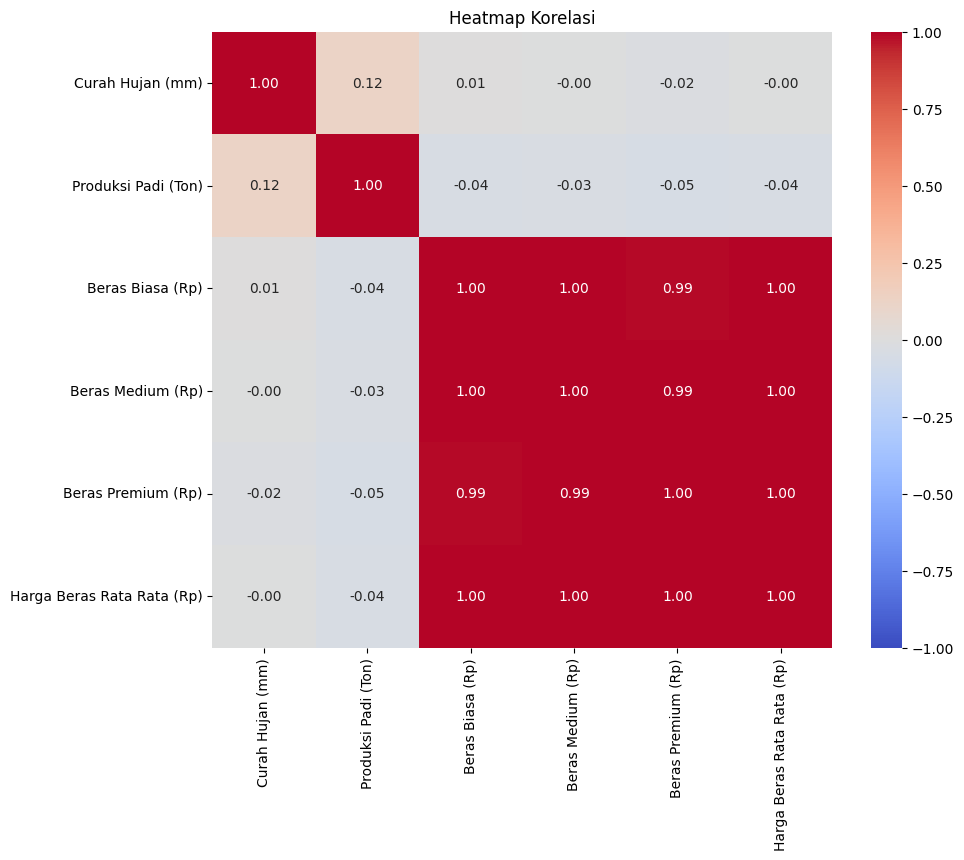

In [ ]:
df = pd.read_csv("Dataset Akhir.csv")
cols_target = [
    'Curah Hujan (mm)',
    'Produksi Padi (Ton)',
    'Beras Biasa (Rp)',
    'Beras Medium (Rp)',
    'Beras Premium (Rp)',
    'Harga Beras Rata Rata (Rp)'
]

for col in cols_target:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df.dropna(subset=cols_target)
corr_matrix = df_clean[cols_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap Korelasi")
plt.show()

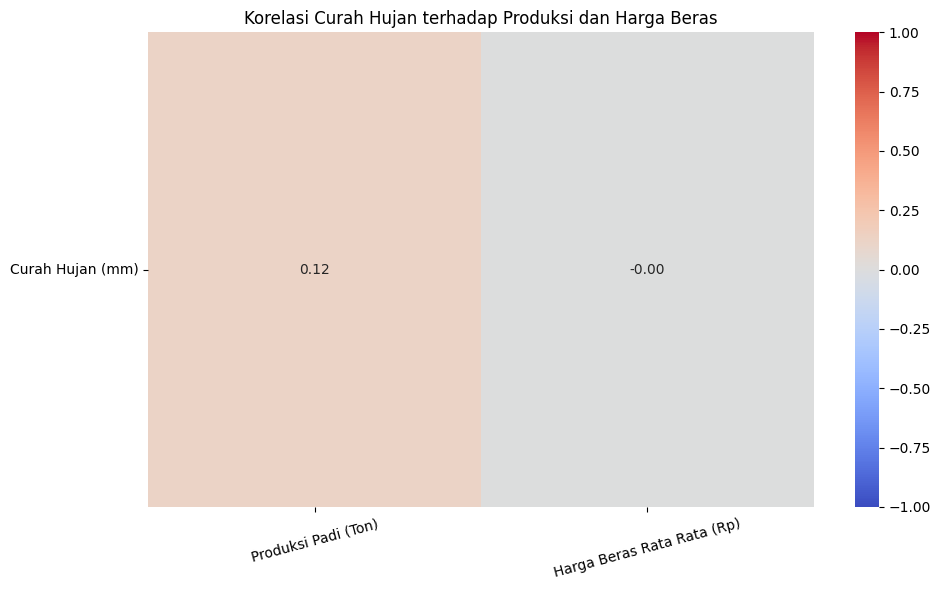

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset Akhir.csv")

cols_target = [
    'Curah Hujan (mm)',
    'Produksi Padi (Ton)',
    'Harga Beras Rata Rata (Rp)'
]

for col in cols_target:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df.dropna(subset=cols_target)
corr_matrix = df_clean[cols_target].corr()
var_penyebab = 'Curah Hujan (mm)'
var_akibat = [col for col in cols_target if col != var_penyebab]
filtered_corr = corr_matrix.loc[[var_penyebab], var_akibat]

plt.figure(figsize=(10, 6))
sns.heatmap(
    filtered_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    cbar_kws={"orientation": "vertical"}
)
plt.title("Korelasi Curah Hujan terhadap Produksi dan Harga Beras")
plt.xticks(rotation=15)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

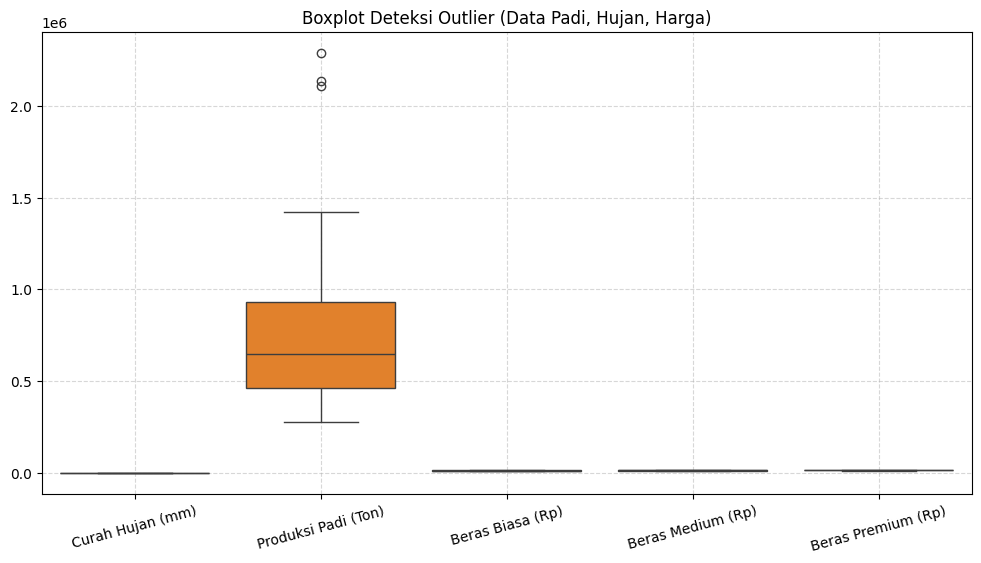


BATAS IQR (Batas Bawah & Atas)
                       Lower     Upper
Curah Hujan (mm)        -286       623
Produksi Padi (Ton) -237,655 1,627,698
Beras Biasa (Rp)       5,282    17,720
Beras Medium (Rp)      6,509    17,734
Beras Premium (Rp)     7,084    19,759

Ditemukan 3 Baris Outlier


,Periode,Produksi Padi (Ton),Curah Hujan (mm),Status Musim,Beras Biasa (Rp),Beras Medium (Rp),Beras Premium (Rp),Harga Beras Rata Rata (Rp)
2,2022-03,"2,290,000",347,Musim Hujan,9575,10225,11275,10358
14,2023-03,"2,109,964",244,Musim Hujan,11175,11850,12750,11925
27,2024-04,"2,135,744",282,Musim Hujan,14275,14575,15775,14875


In [ ]:
file_path = "Dataset Akhir.csv"
df = pd.read_csv(file_path)

cols_numerik = [
    'Curah Hujan (mm)',
    'Produksi Padi (Ton)',
    'Beras Biasa (Rp)',
    'Beras Medium (Rp)',
    'Beras Premium (Rp)'
]

for col in cols_numerik:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_num = df[cols_numerik].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_num)
plt.title("Boxplot Deteksi Outlier (Data Padi, Hujan, Harga)")
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBATAS IQR (Batas Bawah & Atas)")
print(pd.DataFrame({'Lower': lower_bound, 'Upper': upper_bound}))

outlier_mask = (df_num < lower_bound) | (df_num > upper_bound)
outliers = df[outlier_mask.any(axis=1)]

print(f"\nDitemukan {len(outliers)} Baris Outlier")
if not outliers.empty:
    display(outliers)
else:
    print("Tidak ada outlier yang terdeteksi.")

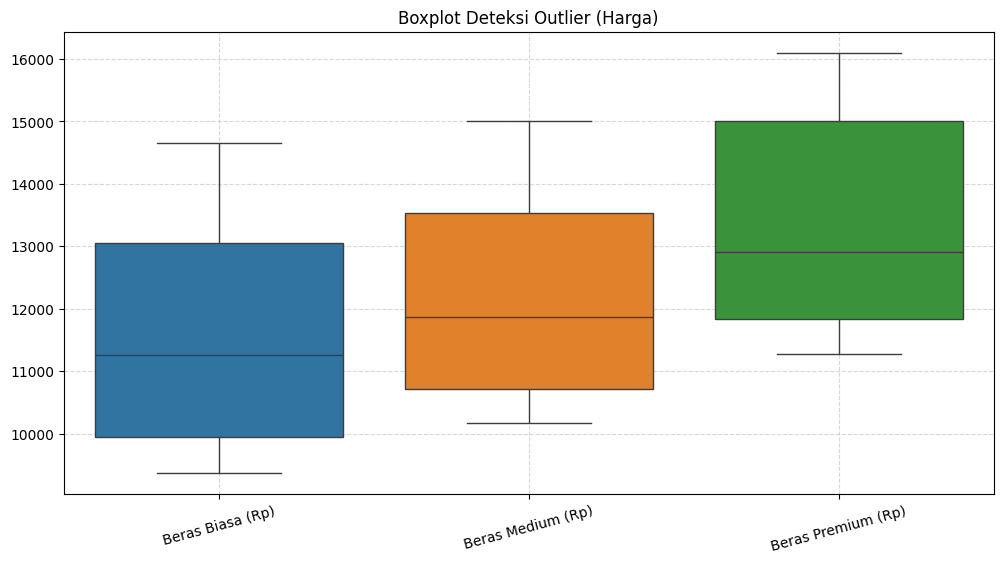


BATAS IQR (Batas Bawah & Atas)
                    Lower  Upper
Beras Biasa (Rp)    5,282 17,720
Beras Medium (Rp)   6,509 17,734
Beras Premium (Rp)  7,084 19,759

Ditemukan 0 Baris Outlier
Tidak ada outlier yang terdeteksi.


In [ ]:
file_path = "Dataset Akhir.csv"
df = pd.read_csv(file_path)

cols_numerik = [
    'Beras Biasa (Rp)',
    'Beras Medium (Rp)',
    'Beras Premium (Rp)'
]

for col in cols_numerik:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_num = df[cols_numerik].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_num)
plt.title("Boxplot Deteksi Outlier (Harga)")
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBATAS IQR (Batas Bawah & Atas)")
print(pd.DataFrame({'Lower': lower_bound, 'Upper': upper_bound}))

outlier_mask = (df_num < lower_bound) | (df_num > upper_bound)
outliers = df[outlier_mask.any(axis=1)]

print(f"\nDitemukan {len(outliers)} Baris Outlier")
if not outliers.empty:
    display(outliers)
else:
    print("Tidak ada outlier yang terdeteksi.")

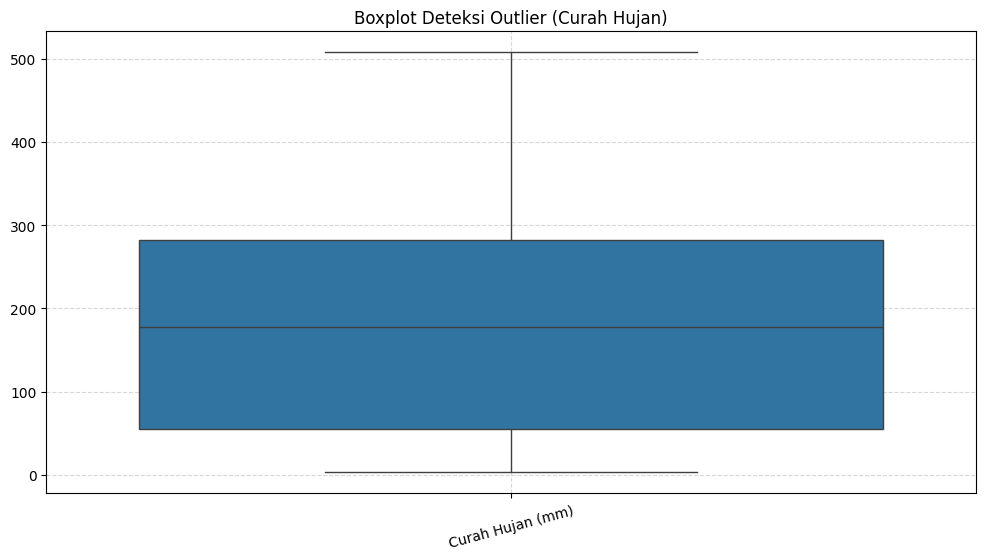


BATAS IQR (Batas Bawah & Atas)
                  Lower  Upper
Curah Hujan (mm)   -286    623

Ditemukan 0 Baris Outlier
Tidak ada outlier yang terdeteksi.


In [ ]:
file_path = "Dataset Akhir.csv"
df = pd.read_csv(file_path)

cols_numerik = [
    'Curah Hujan (mm)'
]

for col in cols_numerik:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_num = df[cols_numerik].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_num)
plt.title("Boxplot Deteksi Outlier (Curah Hujan)")
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBATAS IQR (Batas Bawah & Atas)")
print(pd.DataFrame({'Lower': lower_bound, 'Upper': upper_bound}))

outlier_mask = (df_num < lower_bound) | (df_num > upper_bound)
outliers = df[outlier_mask.any(axis=1)]

print(f"\nDitemukan {len(outliers)} Baris Outlier")
if not outliers.empty:
    display(outliers)
else:
    print("Tidak ada outlier yang terdeteksi.")

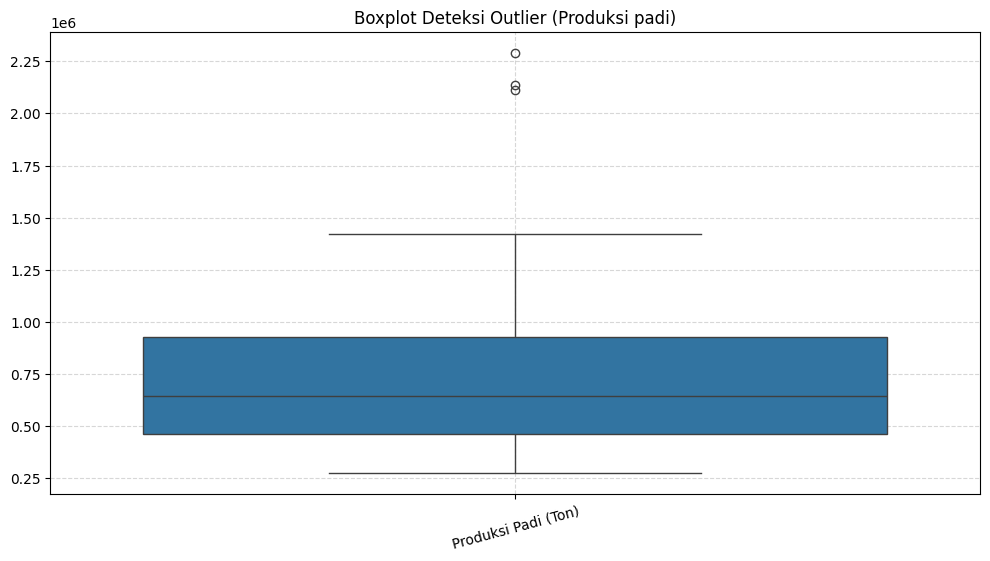


BATAS IQR (Batas Bawah & Atas)
                       Lower     Upper
Produksi Padi (Ton) -237,655 1,627,698

Ditemukan 3 Baris Outlier


,Periode,Produksi Padi (Ton),Curah Hujan (mm),Status Musim,Beras Biasa (Rp),Beras Medium (Rp),Beras Premium (Rp),Harga Beras Rata Rata (Rp)
2,2022-03,"2,290,000",347,Musim Hujan,9575,10225,11275,10358
14,2023-03,"2,109,964",244,Musim Hujan,11175,11850,12750,11925
27,2024-04,"2,135,744",282,Musim Hujan,14275,14575,15775,14875


In [ ]:
file_path = "Dataset Akhir.csv"
df = pd.read_csv(file_path)

cols_numerik = [
    'Produksi Padi (Ton)'
]

for col in cols_numerik:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_num = df[cols_numerik].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_num)
plt.title("Boxplot Deteksi Outlier (Produksi padi)")
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBATAS IQR (Batas Bawah & Atas)")
print(pd.DataFrame({'Lower': lower_bound, 'Upper': upper_bound}))

outlier_mask = (df_num < lower_bound) | (df_num > upper_bound)
outliers = df[outlier_mask.any(axis=1)]

print(f"\nDitemukan {len(outliers)} Baris Outlier")
if not outliers.empty:
    display(outliers)
else:
    print("Tidak ada outlier yang terdeteksi.")

Data Analyzing

In [ ]:
df['Periode_Dt'] = pd.to_datetime(df['Periode'])
df = df.sort_values('Periode_Dt')
cols_target = ['Curah Hujan (mm)', 'Produksi Padi (Ton)', 'Beras Biasa (Rp)', 'Beras Medium (Rp)', 'Beras Premium (Rp)']

for col in cols_target:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

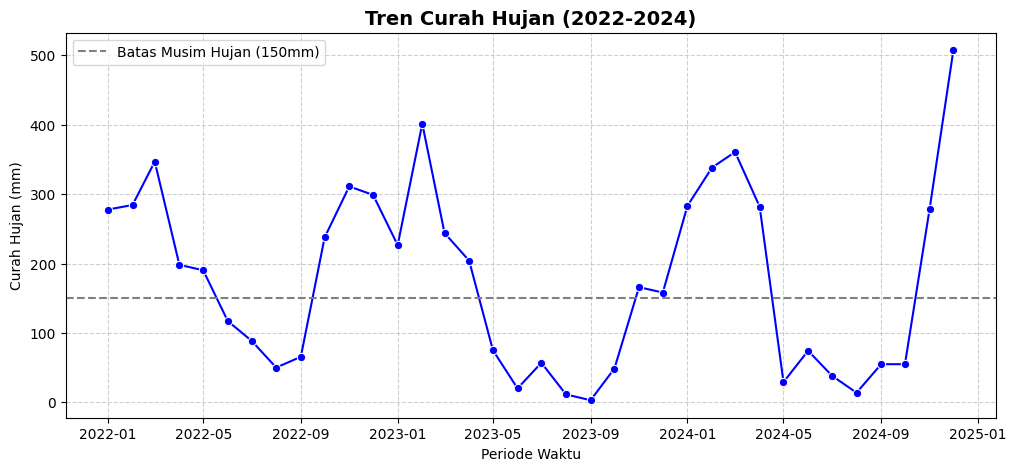

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Periode_Dt', y='Curah Hujan (mm)', color='blue', marker='o')

plt.title('Tren Curah Hujan (2022-2024)', fontsize=14, fontweight='bold')
plt.ylabel('Curah Hujan (mm)')
plt.xlabel('Periode Waktu')
plt.grid(True, linestyle='--', alpha=0.6)

plt.axhline(y=150, color='gray', linestyle='--', label='Batas Musim Hujan (150mm)')
plt.legend()
plt.show()

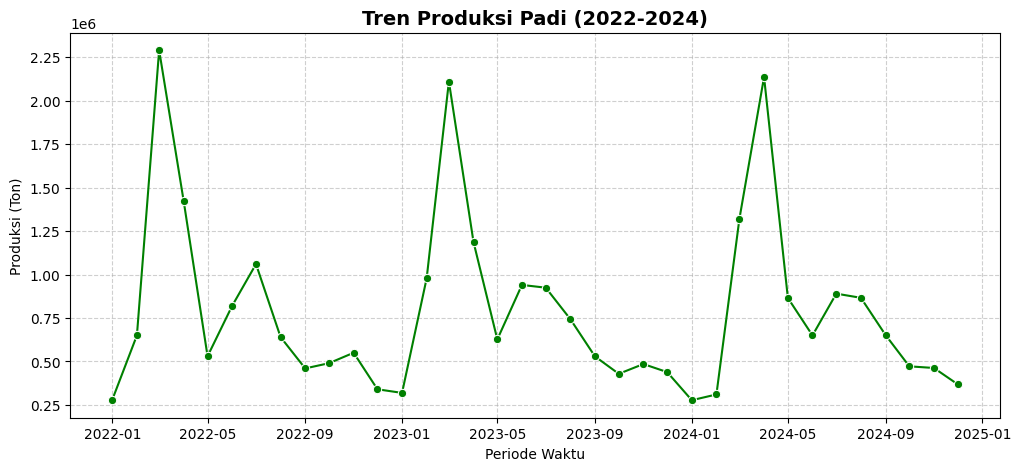

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Periode_Dt', y='Produksi Padi (Ton)', color='green', marker='o')

plt.title('Tren Produksi Padi (2022-2024)', fontsize=14, fontweight='bold')
plt.ylabel('Produksi (Ton)')
plt.xlabel('Periode Waktu')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

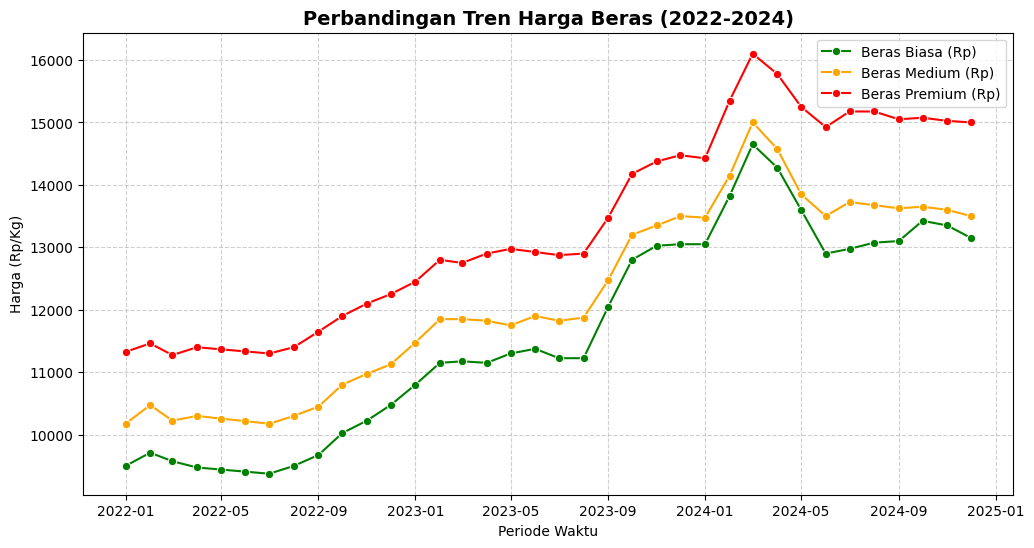

In [ ]:
plt.figure(figsize=(12, 6))

if 'Beras Biasa (Rp)' in df.columns:
    sns.lineplot(data=df, x='Periode_Dt', y='Beras Biasa (Rp)', label='Beras Biasa (Rp)', color='green', marker='o')

if 'Beras Medium (Rp)' in df.columns:
    sns.lineplot(data=df, x='Periode_Dt', y='Beras Medium (Rp)', label='Beras Medium (Rp)', color='orange', marker='o')

if 'Beras Premium (Rp)' in df.columns:
    sns.lineplot(data=df, x='Periode_Dt', y='Beras Premium (Rp)', label='Beras Premium (Rp)', color='red', marker='o')

plt.title('Perbandingan Tren Harga Beras (2022-2024)', fontsize=14, fontweight='bold')
plt.ylabel('Harga (Rp/Kg)')
plt.xlabel('Periode Waktu')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
df['Periode_Dt'] = pd.to_datetime(df['Periode'])
df = df.sort_values('Periode_Dt')
cols_target = [
    'Curah Hujan (mm)',
    'Produksi Padi (Ton)',
    'Beras Biasa (Rp)',
    'Beras Medium (Rp)',
    'Beras Premium (Rp)'
]

for col in cols_target:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['Curah Hujan (Lag 4 Bulan)'] = df['Curah Hujan (mm)'].shift(4)
df['Produksi (Lag 1 Bulan)'] = df['Produksi Padi (Ton)'].shift(1)

df_final = df.dropna(subset=['Curah Hujan (Lag 4 Bulan)', 'Produksi (Lag 1 Bulan)'])

print("Data Time Lag siap. Lanjut ke Visualisasi.")
print(df_final[['Periode_Dt', 'Curah Hujan (mm)', 'Curah Hujan (Lag 4 Bulan)', 'Produksi Padi (Ton)', 'Produksi (Lag 1 Bulan)']].head())

Data Time Lag siap. Lanjut ke Visualisasi.
  Periode_Dt  Curah Hujan (mm)  Curah Hujan (Lag 4 Bulan)  \
4 2022-05-01               190                        278   
5 2022-06-01               117                        284   
6 2022-07-01                89                        347   
7 2022-08-01                50                        198   
8 2022-09-01                66                        190   

   Produksi Padi (Ton)  Produksi (Lag 1 Bulan)  
4              530,000               1,420,000  
5              820,000                 530,000  
6            1,060,000                 820,000  
7              640,000               1,060,000  
8              460,000                 640,000  


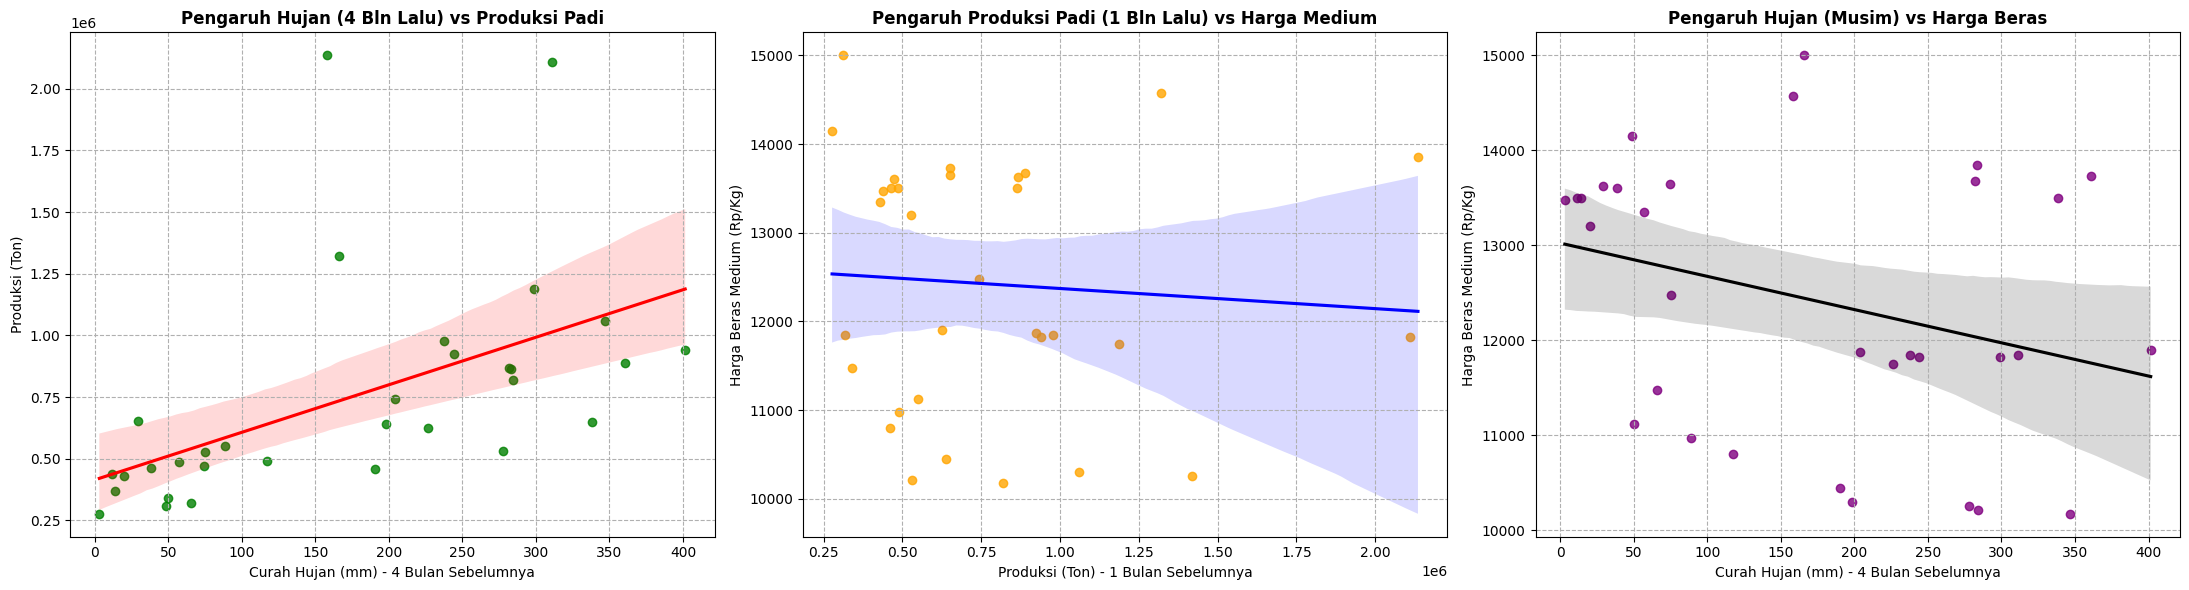

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

sns.regplot(data=df_final, x='Curah Hujan (Lag 4 Bulan)', y='Produksi Padi (Ton)', ax=ax[0],
            color='green', line_kws={'color':'red'})
ax[0].set_title('Pengaruh Hujan (4 Bln Lalu) vs Produksi Padi', fontweight='bold')
ax[0].set_xlabel('Curah Hujan (mm) - 4 Bulan Sebelumnya')
ax[0].set_ylabel('Produksi (Ton)')
ax[0].grid(True, linestyle='--')

sns.regplot(data=df_final, x='Produksi (Lag 1 Bulan)', y='Beras Medium (Rp)', ax=ax[1],
            color='orange', line_kws={'color':'blue'})
ax[1].set_title('Pengaruh Produksi Padi (1 Bln Lalu) vs Harga Medium', fontweight='bold')
ax[1].set_xlabel('Produksi (Ton) - 1 Bulan Sebelumnya')
ax[1].set_ylabel('Harga Beras Medium (Rp/Kg)')
ax[1].grid(True, linestyle='--')

sns.regplot(data=df_final, x='Curah Hujan (Lag 4 Bulan)', y='Beras Medium (Rp)', ax=ax[2],
            color='purple', line_kws={'color':'black'})
ax[2].set_title('Pengaruh Hujan (Musim) vs Harga Beras', fontweight='bold')
ax[2].set_xlabel('Curah Hujan (mm) - 4 Bulan Sebelumnya')
ax[2].set_ylabel('Harga Beras Medium (Rp/Kg)')
ax[2].grid(True, linestyle='--')

plt.tight_layout()
plt.show()